In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
#from sklearn.ensemble import VotingClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import LinearSVC

# fund_specs

In [5]:
fund_specs=pd.read_csv('fund_specs.csv',thousands=',')
fund_specs.nunique()

investment_class         3
currency                 1
total_assets          6013
yield                  890
greatstone_rating        6
inception_date        4383
tag                  25000
fund_size                3
return_ytd            2751
dtype: int64

In [6]:
fund_specs.head()

,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
0,Value,USD,1.185000e+07,5.57,NaN,2015-02-02,67922,Large,20.19
1,Growth,USD,1.397000e+10,0.42,3.0,2012-05-30,134783,Large,16.79
2,Growth,USD,2.660000e+09,0.02,4.0,1987-08-23,61271,Large,17.13
3,Value,USD,1.957000e+10,2.71,3.0,2005-10-24,64412,Large,11.63
4,Blend,USD,2.847000e+07,2.44,0.0,2016-12-12,184058,Large,10.25


In [95]:
fund_specs.drop(labels=['currency'],axis=1,inplace=True)
fund_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
investment_class     23520 non-null object
total_assets         24881 non-null float64
yield                24873 non-null float64
greatstone_rating    20000 non-null float64
inception_date       25000 non-null object
tag                  25000 non-null int64
fund_size            23520 non-null object
return_ytd           24892 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.5+ MB


In [96]:
date_array=fund_specs['inception_date'].str.split('-')

In [97]:
date_array

0        [2015, 02, 02]
1        [2012, 05, 30]
2        [1987, 08, 23]
3        [2005, 10, 24]
4        [2016, 12, 12]
              ...      
24995    [1986, 12, 29]
24996    [2003, 09, 01]
24997    [2014, 11, 30]
24998    [2000, 06, 25]
24999    [2001, 06, 17]
Name: inception_date, Length: 25000, dtype: object

In [98]:
for i in range(0,fund_specs.inception_date.size):
    fund_specs['inception_date'][i]=date_array[i][0]

C:\Users\anmol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [99]:
fund_specs.inception_date=fund_specs.inception_date.astype('int32')

In [100]:
fund_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
investment_class     23520 non-null object
total_assets         24881 non-null float64
yield                24873 non-null float64
greatstone_rating    20000 non-null float64
inception_date       25000 non-null int32
tag                  25000 non-null int64
fund_size            23520 non-null object
return_ytd           24892 non-null float64
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 1.4+ MB


In [101]:
fund_specs.nunique()

investment_class         3
total_assets          6013
yield                  890
greatstone_rating        6
inception_date          88
tag                  25000
fund_size                3
return_ytd            2751
dtype: int64

In [102]:
fund_specs[['investment_class','fund_size']]=fund_specs[['investment_class','fund_size']].fillna(method='bfill')

In [103]:
fund_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
investment_class     25000 non-null object
total_assets         24881 non-null float64
yield                24873 non-null float64
greatstone_rating    20000 non-null float64
inception_date       25000 non-null int32
tag                  25000 non-null int64
fund_size            25000 non-null object
return_ytd           24892 non-null float64
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 1.4+ MB


In [104]:
fund_specs.investment_class.replace({'Growth':0,'Blend':1,'Value':2},inplace=True)

In [105]:
fund_specs.fund_size.replace({'Small':0,'Medium':1,'Large':2},inplace=True)

In [106]:
fund_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
investment_class     25000 non-null int64
total_assets         24881 non-null float64
yield                24873 non-null float64
greatstone_rating    20000 non-null float64
inception_date       25000 non-null int32
tag                  25000 non-null int64
fund_size            25000 non-null int64
return_ytd           24892 non-null float64
dtypes: float64(4), int32(1), int64(3)
memory usage: 1.4 MB


In [107]:
fund_specs.total_assets.fillna(fund_specs.total_assets.median(),inplace=True)

In [108]:
fund_specs.corrwith(fund_specs.greatstone_rating)

investment_class    -0.063343
total_assets         0.110571
yield                0.082698
greatstone_rating    1.000000
inception_date      -0.143729
tag                  0.001028
fund_size           -0.036445
return_ytd           0.112224
dtype: float64

In [109]:
fund_specs.return_ytd.fillna(fund_specs.return_ytd.median(),inplace=True)

In [110]:
fund_specs['yield'].fillna(fund_specs['yield'].median(),inplace=True)

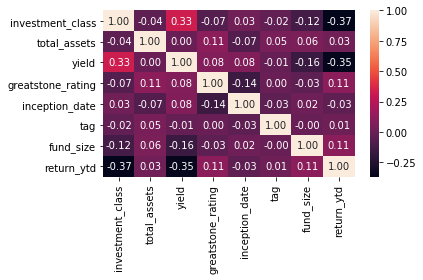

In [54]:
#plt.figure(figsize=(40,40))
corr=fund_specs.corr()
fund_specs_corr=sns.heatmap(corr,annot=True, fmt='.2f')
b,t=fund_specs_corr.get_ylim()
fund_specs_corr.set_ylim(b+.5,t-.5)
plt.tight_layout()

# fund_ratios

In [233]:
fund_ratios=pd.read_csv('fund_ratios.csv',thousands=',')
fund_ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
fund_id                          25000 non-null object
tag                              25000 non-null int64
fund_ratio_net_annual_expense    25000 non-null float64
pb_ratio                         24886 non-null float64
ps_ratio                         24886 non-null float64
mmc                              24886 non-null float64
pc_ratio                         24886 non-null float64
pe_ratio                         24886 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.5+ MB


In [234]:
fund_ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
tag,25000.0,139878.934640,65731.287074,26000.0,83021.75,139881.50,196759.250,253763.00
fund_ratio_net_annual_expense,25000.0,1.121677,0.609215,0.0,0.72,1.01,1.440,15.17
pb_ratio,24886.0,1.854262,2.984248,0.0,0.56,1.85,2.380,123.30
ps_ratio,24886.0,1.739073,30.589236,0.0,0.32,1.29,1.800,2777.78
mmc,24886.0,28195.536154,33609.823308,0.0,510.96,16974.33,42810.135,363960.31
pc_ratio,24886.0,17.390380,457.933286,0.0,0.62,6.97,8.950,20000.00
pe_ratio,24886.0,13.460729,45.312060,0.0,4.44,13.98,16.480,1694.92


In [235]:
fund_ratios['pb_ratio'].fillna(fund_ratios['pb_ratio'].mean(),inplace=True)
fund_ratios['ps_ratio'].fillna(fund_ratios['ps_ratio'].mean(),inplace=True)
fund_ratios['mmc'].fillna(fund_ratios['mmc'].median(),inplace=True)
fund_ratios['pc_ratio'].fillna(fund_ratios['pc_ratio'].mean(),inplace=True)
fund_ratios['pe_ratio'].fillna(fund_ratios['pe_ratio'].mean(),inplace=True)

In [236]:
fund_ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
fund_id                          25000 non-null object
tag                              25000 non-null int64
fund_ratio_net_annual_expense    25000 non-null float64
pb_ratio                         25000 non-null float64
ps_ratio                         25000 non-null float64
mmc                              25000 non-null float64
pc_ratio                         25000 non-null float64
pe_ratio                         25000 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.5+ MB


# bond_ratings

In [362]:
bond_ratings=pd.read_csv('bond_ratings.csv')
bond_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
bb_rating              24886 non-null float64
us_govt_bond_rating    24886 non-null float64
below_b_rating         24886 non-null float64
others_rating          24886 non-null float64
maturity_bond          8093 non-null float64
b_rating               24886 non-null float64
tag                    25000 non-null int64
a_rating               24886 non-null float64
aaa_rating             24886 non-null float64
aa_rating              24886 non-null float64
bbb_rating             24886 non-null float64
duration_bond          9874 non-null float64
dtypes: float64(11), int64(1)
memory usage: 2.3 MB


In [363]:
bond_ratings.maturity_bond.fillna(bond_ratings.maturity_bond.mean(),inplace=True)

In [364]:
bond_ratings.duration_bond.fillna(bond_ratings.duration_bond.mean(),inplace=True)
bond_ratings.drop(labels='us_govt_bond_rating',axis=1,inplace=True)
bond_ratings.fillna(0,inplace=True)

In [365]:
bond_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
bb_rating         25000 non-null float64
below_b_rating    25000 non-null float64
others_rating     25000 non-null float64
maturity_bond     25000 non-null float64
b_rating          25000 non-null float64
tag               25000 non-null int64
a_rating          25000 non-null float64
aaa_rating        25000 non-null float64
aa_rating         25000 non-null float64
bbb_rating        25000 non-null float64
duration_bond     25000 non-null float64
dtypes: float64(10), int64(1)
memory usage: 2.1 MB


# fund_allocations

In [674]:
fund_allocations=pd.read_csv('fund_allocations.csv')
fund_allocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
portfolio_communication_allocation        24886 non-null float64
portfolio_financial_services              24886 non-null float64
portfolio_industrials_allocation          24886 non-null float64
portfolio_tech_allocation                 24886 non-null float64
portfolio_materials_basic_allocation      24886 non-null float64
portfolio_energy_allocation               24886 non-null float64
portfolio_consumer_defence_allocation     24886 non-null float64
portfolio_healthcare_allocation           24886 non-null float64
portfolio_property_allocation             24886 non-null float64
id                                        25000 non-null int64
portfolio_utils_allocation                24886 non-null float64
portfolio_cyclical_consumer_allocation    24886 non-null float64
dtypes: float64(11), int64(1)
memory usage: 2.3 MB


In [675]:
fund_allocations.drop(labels=['portfolio_materials_basic_allocation','portfolio_energy_allocation'],axis=1,inplace=True)

In [676]:
fund_allocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
portfolio_communication_allocation        24886 non-null float64
portfolio_financial_services              24886 non-null float64
portfolio_industrials_allocation          24886 non-null float64
portfolio_tech_allocation                 24886 non-null float64
portfolio_consumer_defence_allocation     24886 non-null float64
portfolio_healthcare_allocation           24886 non-null float64
portfolio_property_allocation             24886 non-null float64
id                                        25000 non-null int64
portfolio_utils_allocation                24886 non-null float64
portfolio_cyclical_consumer_allocation    24886 non-null float64
dtypes: float64(9), int64(1)
memory usage: 1.9 MB


In [677]:
fund_allocations['portfolio_tech_allocation'].fillna(fund_allocations['portfolio_tech_allocation'].median(),inplace=True)

In [679]:
fund_allocations['portfolio_utils_allocation'].fillna(fund_allocations['portfolio_utils_allocation'].median(),inplace=True)

In [680]:
fund_allocations.fillna(fund_allocations.mean(),inplace=True)

In [681]:
fund_allocations.rename(columns={'id':'tag'}, inplace=True)

In [682]:
fund_allocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
portfolio_communication_allocation        25000 non-null float64
portfolio_financial_services              25000 non-null float64
portfolio_industrials_allocation          25000 non-null float64
portfolio_tech_allocation                 25000 non-null float64
portfolio_consumer_defence_allocation     25000 non-null float64
portfolio_healthcare_allocation           25000 non-null float64
portfolio_property_allocation             25000 non-null float64
tag                                       25000 non-null int64
portfolio_utils_allocation                25000 non-null float64
portfolio_cyclical_consumer_allocation    25000 non-null float64
dtypes: float64(9), int64(1)
memory usage: 1.9 MB


# other_specs

In [434]:
other_specs=pd.read_csv('other_specs.csv',thousands=',')
other_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 43 columns):
2014_category_return                 18817 non-null float64
2012_return_category                 15876 non-null float64
years_up                             23188 non-null float64
2018_return_category                 24191 non-null float64
tag                                  25000 non-null int64
category_return_1year                24885 non-null float64
cash_percent_of_portfolio            24886 non-null float64
pc_ratio                             24886 non-null float64
2011_return_category                 14467 non-null float64
ytd_return_fund                      24885 non-null float64
years_down                           23359 non-null float64
2014_return_fund                     17794 non-null float64
category_return_1month               24885 non-null float64
2013_return_fund                     16462 non-null float64
fund_return_3months                  24885 non-null f

In [435]:
other_specs.drop(labels=['pc_ratio','pb_ratio','pe_ratio','mmc','ps_ratio'],axis=1,inplace=True)

In [436]:
other_specs[['cash_percent_of_portfolio',
             'stock_percent_of_portfolio',
             'portfolio_others',
             'bond_percentage_of_porfolio',
             'portfolio_preferred',
             'portfolio_convertable']]=other_specs[['cash_percent_of_portfolio',
             'stock_percent_of_portfolio',
             'portfolio_others',
             'bond_percentage_of_porfolio',
             'portfolio_preferred',
             'portfolio_convertable']].fillna(16.67)

In [437]:
other_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 38 columns):
2014_category_return                 18817 non-null float64
2012_return_category                 15876 non-null float64
years_up                             23188 non-null float64
2018_return_category                 24191 non-null float64
tag                                  25000 non-null int64
category_return_1year                24885 non-null float64
cash_percent_of_portfolio            25000 non-null float64
2011_return_category                 14467 non-null float64
ytd_return_fund                      24885 non-null float64
years_down                           23359 non-null float64
2014_return_fund                     17794 non-null float64
category_return_1month               24885 non-null float64
2013_return_fund                     16462 non-null float64
fund_return_3months                  24885 non-null float64
ytd_return_category                  24885 non-null f

In [438]:
nul_cat_tag_list=fund_specs[['tag','inception_date']]

In [439]:
dateEqual2018=[]
dateEqual2017=[]
dateEqual2016=[]
dateEqual2015=[]
dateEqual2014=[]
dateEqual2013=[]
dateEqual2012=[]
dateEqual2011=[]
dateEqual2010=[]

for tagVal,date in nul_cat_tag_list.itertuples(index=False):
    if date==2018:
        dateEqual2018.append(tagVal)
    elif date==2017:
        dateEqual2017.append(tagVal)
    elif date==2016:
        dateEqual2016.append(tagVal)
    elif date==2015:
        dateEqual2015.append(tagVal)
    elif date==2014:
        dateEqual2014.append(tagVal)
    elif date==2013:
        dateEqual2013.append(tagVal)
    elif date==2012:
        dateEqual2012.append(tagVal)
    elif date==2011:
        dateEqual2011.append(tagVal)
    elif date>2011:
        dateEqual2010.append(tagVal)

In [440]:
other_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 38 columns):
2014_category_return                 18817 non-null float64
2012_return_category                 15876 non-null float64
years_up                             23188 non-null float64
2018_return_category                 24191 non-null float64
tag                                  25000 non-null int64
category_return_1year                24885 non-null float64
cash_percent_of_portfolio            25000 non-null float64
2011_return_category                 14467 non-null float64
ytd_return_fund                      24885 non-null float64
years_down                           23359 non-null float64
2014_return_fund                     17794 non-null float64
category_return_1month               24885 non-null float64
2013_return_fund                     16462 non-null float64
fund_return_3months                  24885 non-null float64
ytd_return_category                  24885 non-null f

In [441]:
for tagVal in dateEqual2011:
    if other_specs[other_specs.tag==tagVal]['2010_return_category'].isna().values[0]:
        other_specs['2010_return_fund']=other_specs['2010_return_fund'].fillna(0)
        other_specs['2010_return_category']=other_specs['2010_return_category'].fillna(0)

In [442]:
for tagVal in dateEqual2012:
    if other_specs[other_specs.tag==tagVal]['2011_return_category'].isna().values[0]:
        other_specs['2011_return_fund']=other_specs['2011_return_fund'].fillna(0)
        other_specs['2011_return_category']=other_specs['2011_return_category'].fillna(0)

In [443]:
for tagVal in dateEqual2013:
    if other_specs[other_specs.tag==tagVal]['2012_return_category'].isna().values[0]:
        other_specs['2012_fund_return']=other_specs['2012_fund_return'].fillna(0)
        other_specs['2012_return_category']=other_specs['2012_return_category'].fillna(0)

In [444]:
for tagVal in dateEqual2014:
    if other_specs[other_specs.tag==tagVal]['2013_category_return'].isna().values[0]:
        other_specs['2013_return_fund']=other_specs['2013_return_fund'].fillna(0)
        other_specs['2013_category_return']=other_specs['2013_category_return'].fillna(0)

In [445]:
for tagVal in dateEqual2015:
    if other_specs[other_specs.tag==tagVal]['2014_category_return'].isna().values[0]:
        other_specs['2014_return_fund']=other_specs['2014_return_fund'].fillna(0)
        other_specs['2014_category_return']=other_specs['2014_category_return'].fillna(0)

In [446]:
for tagVal in dateEqual2016:
    if other_specs[other_specs.tag==tagVal]['category_return_2015'].isna().values[0]:
        other_specs['2015_return_fund']=other_specs['2015_return_fund'].fillna(0)
        other_specs['category_return_2015']=other_specs['category_return_2015'].fillna(0)

In [447]:
for tagVal in dateEqual2017:
    if other_specs[other_specs.tag==tagVal]['2016_return_category'].isna().values[0]:
        other_specs['2016_return_fund']=other_specs['2016_return_fund'].fillna(0)
        other_specs['2016_return_category']=other_specs['2016_return_category'].fillna(0)

In [448]:
for tagVal in dateEqual2018:
    if other_specs[other_specs.tag==tagVal]['2017_category_return'].isna().values[0]:
        other_specs['2017_return_fund']=other_specs['2017_return_fund'].fillna(0)
        other_specs['2017_category_return']=other_specs['2017_category_return'].fillna(0)

In [449]:
other_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 38 columns):
2014_category_return                 25000 non-null float64
2012_return_category                 25000 non-null float64
years_up                             23188 non-null float64
2018_return_category                 24191 non-null float64
tag                                  25000 non-null int64
category_return_1year                24885 non-null float64
cash_percent_of_portfolio            25000 non-null float64
2011_return_category                 25000 non-null float64
ytd_return_fund                      24885 non-null float64
years_down                           23359 non-null float64
2014_return_fund                     25000 non-null float64
category_return_1month               24885 non-null float64
2013_return_fund                     25000 non-null float64
fund_return_3months                  24885 non-null float64
ytd_return_category                  24885 non-null f

In [450]:
#other_specs=other_specs.fillna(0)

In [451]:
other_specs=other_specs.drop(labels=['greatstone_rating'],axis=1)

In [452]:
other_specs.fillna(other_specs.mean(),inplace=True)

In [453]:
other_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 37 columns):
2014_category_return                 25000 non-null float64
2012_return_category                 25000 non-null float64
years_up                             25000 non-null float64
2018_return_category                 25000 non-null float64
tag                                  25000 non-null int64
category_return_1year                25000 non-null float64
cash_percent_of_portfolio            25000 non-null float64
2011_return_category                 25000 non-null float64
ytd_return_fund                      25000 non-null float64
years_down                           25000 non-null float64
2014_return_fund                     25000 non-null float64
category_return_1month               25000 non-null float64
2013_return_fund                     25000 non-null float64
fund_return_3months                  25000 non-null float64
ytd_return_category                  25000 non-null f

# 3 years file

In [56]:
return_3year=pd.read_csv('return_3year.csv',thousands=',')
return_3year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
tag                                    25000 non-null int64
3yrs_treynor_ratio_fund                23352 non-null float64
3_years_alpha_fund                     23352 non-null float64
3years_category_std                    24894 non-null float64
3yrs_sharpe_ratio_fund                 23352 non-null float64
3yrs_treynor_ratio_category            24894 non-null float64
3_years_return_mean_annual_fund        23352 non-null float64
fund_beta_3years                       23352 non-null float64
3years_fund_r_squared                  23352 non-null float64
3years_fund_std                        23352 non-null float64
category_beta_3years                   24894 non-null float64
fund_return_3years                     24885 non-null float64
3_years_alpha_category                 24894 non-null float64
3_years_return_mean_annual_category    24894 non-null float64
3yrs_sharpe_ratio_categor

In [57]:
return_3year.nunique()

tag                                    25000
3yrs_treynor_ratio_fund                 3451
3_years_alpha_fund                      2087
3years_category_std                       22
3yrs_sharpe_ratio_fund                   433
3yrs_treynor_ratio_category               28
3_years_return_mean_annual_fund          388
fund_beta_3years                         356
3years_fund_r_squared                   6896
3years_fund_std                         2193
category_beta_3years                       5
fund_return_3years                      2649
3_years_alpha_category                    16
3_years_return_mean_annual_category        4
3yrs_sharpe_ratio_category                 3
3years_category_r_squared                 57
3_years_return_category                  102
dtype: int64

In [58]:
return_3year.fillna(return_3year.mean(),inplace=True)

In [59]:
return_3year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
tag                                    25000 non-null int64
3yrs_treynor_ratio_fund                25000 non-null float64
3_years_alpha_fund                     25000 non-null float64
3years_category_std                    25000 non-null float64
3yrs_sharpe_ratio_fund                 25000 non-null float64
3yrs_treynor_ratio_category            25000 non-null float64
3_years_return_mean_annual_fund        25000 non-null float64
fund_beta_3years                       25000 non-null float64
3years_fund_r_squared                  25000 non-null float64
3years_fund_std                        25000 non-null float64
category_beta_3years                   25000 non-null float64
fund_return_3years                     25000 non-null float64
3_years_alpha_category                 25000 non-null float64
3_years_return_mean_annual_category    25000 non-null float64
3yrs_sharpe_ratio_categor

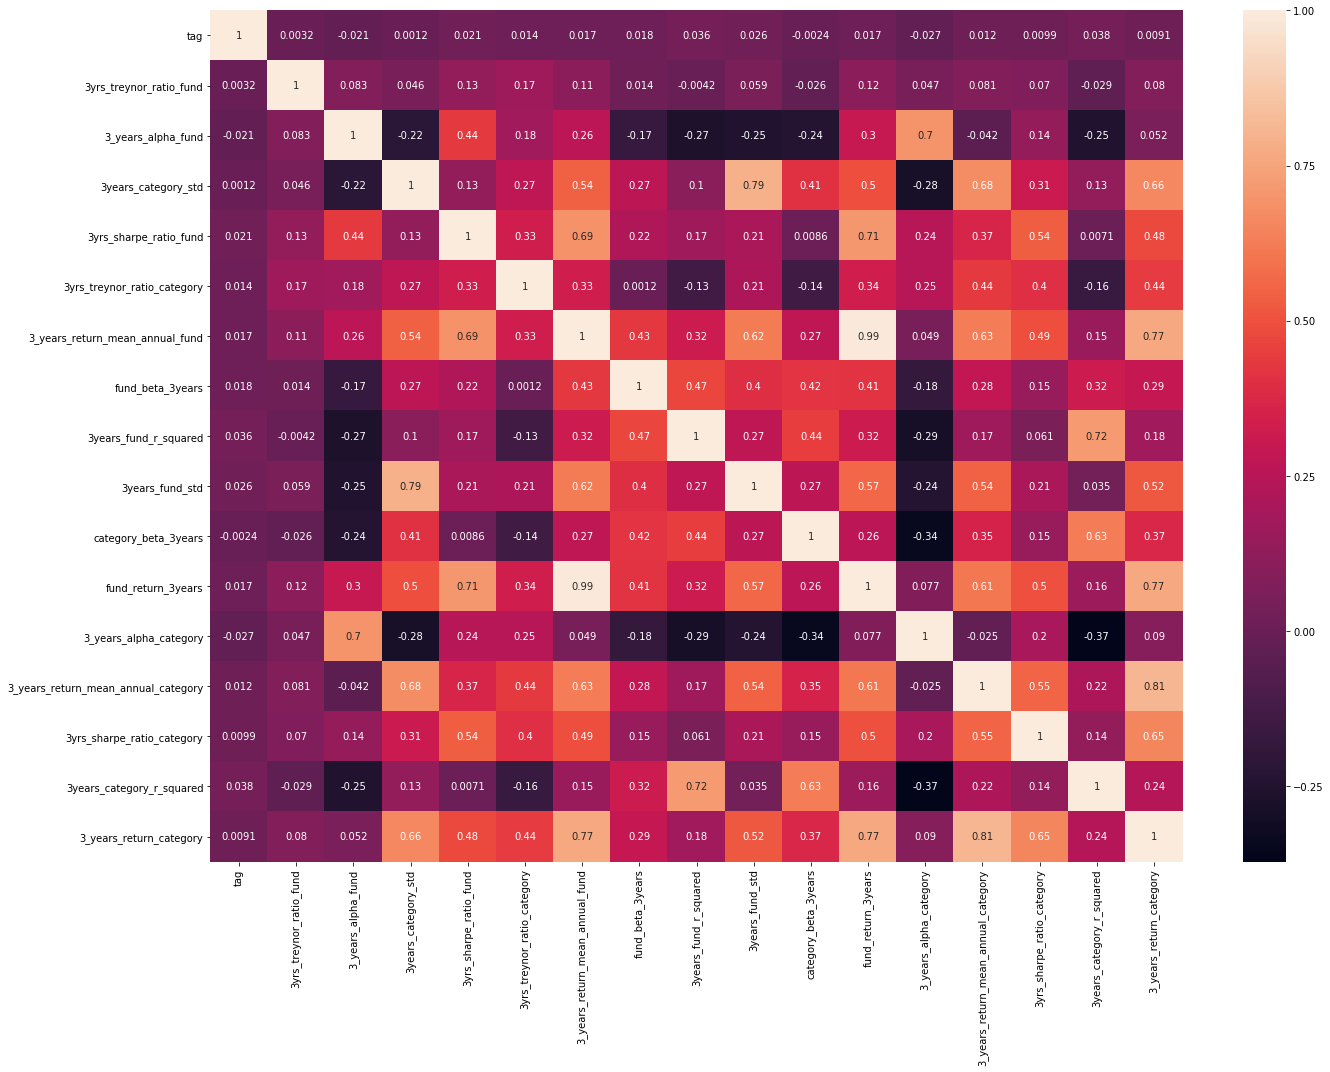

In [214]:
plt.figure(figsize=(20,15))
return_3year_corr=sns.heatmap(return_3year.corr(), annot=True)
b,t=return_3year_corr.get_ylim()
return_3year_corr.set_ylim(b+.5,t-.5)
plt.tight_layout()

# 5 year file

In [60]:
return_5year=pd.read_csv('return_5year.csv',thousands=',')
return_5year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
category_r_squared_5years              24894 non-null float64
5yrs_sharpe_ratio_fund                 21157 non-null float64
5_years_alpha_fund                     21157 non-null float64
5years_fund_r_squared                  21157 non-null float64
5years_fund_std                        21157 non-null float64
5yrs_sharpe_ratio_category             24894 non-null float64
5_years_beta_fund                      21157 non-null float64
5yrs_treynor_ratio_fund                21157 non-null float64
5_years_return_mean_annual_fund        21157 non-null float64
5_years_return_mean_annual_category    24894 non-null float64
5yrs_treynor_ratio_category            24894 non-null float64
5_years_return_fund                    24885 non-null float64
5_years_alpha_category                 24894 non-null float64
5_years_beta_category                  24894 non-null float64
5years_category_std    

In [61]:
return_5year.fillna(return_5year.mean(),inplace=True)
return_5year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
category_r_squared_5years              25000 non-null float64
5yrs_sharpe_ratio_fund                 25000 non-null float64
5_years_alpha_fund                     25000 non-null float64
5years_fund_r_squared                  25000 non-null float64
5years_fund_std                        25000 non-null float64
5yrs_sharpe_ratio_category             25000 non-null float64
5_years_beta_fund                      25000 non-null float64
5yrs_treynor_ratio_fund                25000 non-null float64
5_years_return_mean_annual_fund        25000 non-null float64
5_years_return_mean_annual_category    25000 non-null float64
5yrs_treynor_ratio_category            25000 non-null float64
5_years_return_fund                    25000 non-null float64
5_years_alpha_category                 25000 non-null float64
5_years_beta_category                  25000 non-null float64
5years_category_std    

In [62]:
return_5year.nunique()

category_r_squared_5years                 60
5yrs_sharpe_ratio_fund                   345
5_years_alpha_fund                      2017
5years_fund_r_squared                   6488
5years_fund_std                         2179
5yrs_sharpe_ratio_category                 4
5_years_beta_fund                        340
5yrs_treynor_ratio_fund                 2822
5_years_return_mean_annual_fund          329
5_years_return_mean_annual_category        4
5yrs_treynor_ratio_category               25
5_years_return_fund                     2248
5_years_alpha_category                    19
5_years_beta_category                      6
5years_category_std                       26
tag                                    25000
5_years_return_category                  100
dtype: int64

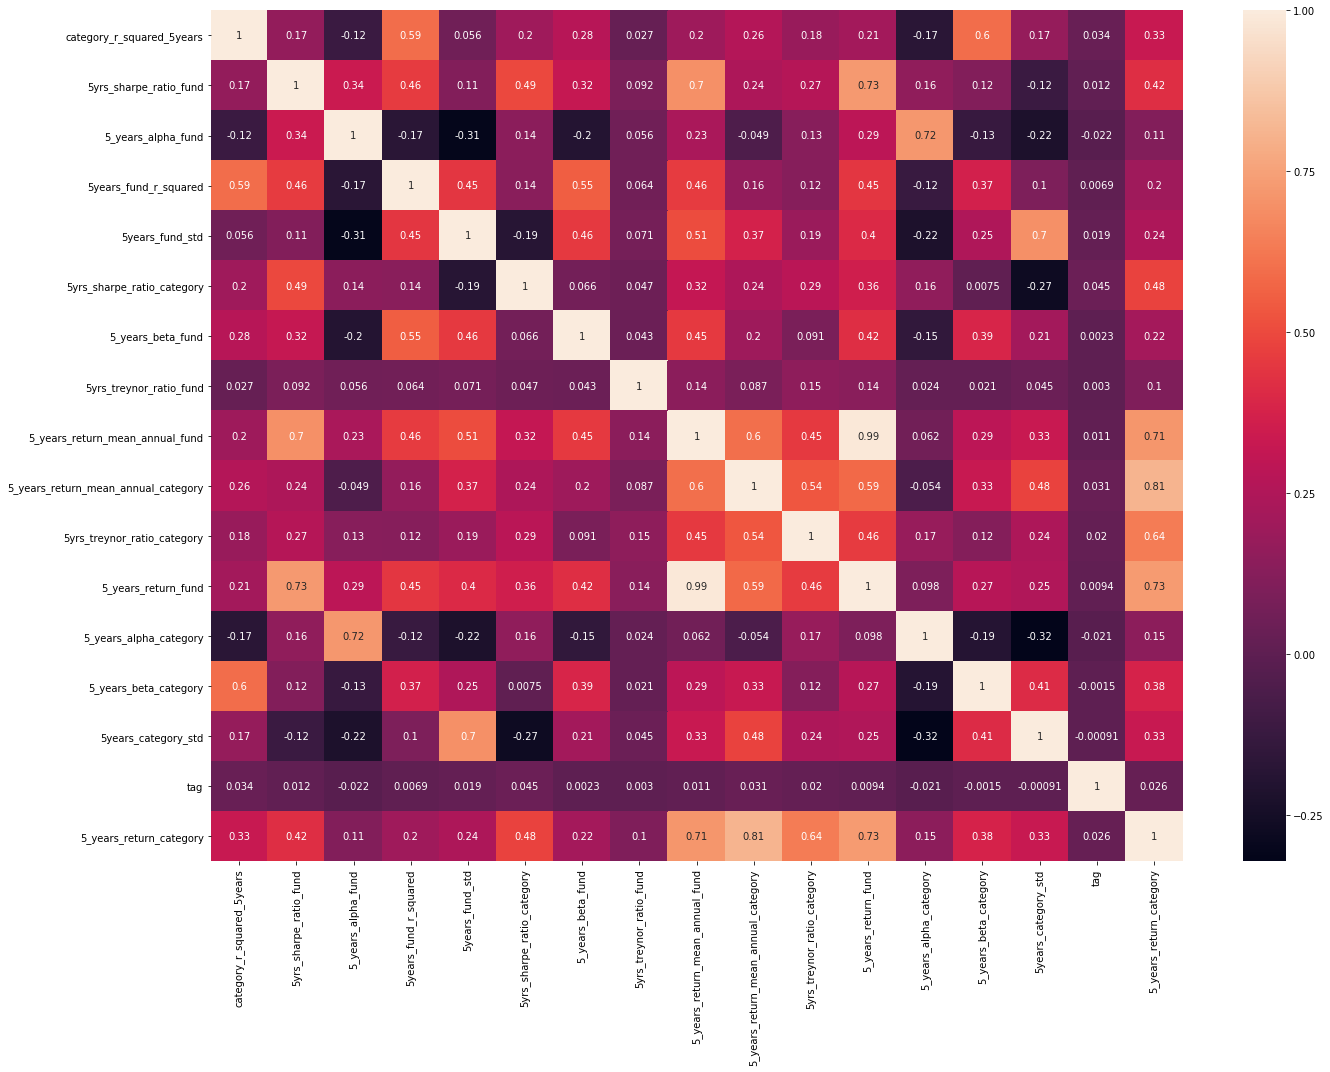

In [213]:
plt.figure(figsize=(20,15))
return_5year_corr=sns.heatmap(return_5year.corr(), annot=True)
b,t=return_5year_corr.get_ylim()
return_5year_corr.set_ylim(b+.5,t-.5)
plt.tight_layout()

# 10 year file

In [63]:
return_10year=pd.read_csv('return_10year.csv',thousands=',')
return_10year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
10years_category_r_squared              24894 non-null float64
10yrs_sharpe_ratio_fund                 16416 non-null float64
10_years_alpha_fund                     16416 non-null float64
10years_fund_r_squared                  16416 non-null float64
10years_fund_std                        16416 non-null float64
10yrs_sharpe_ratio_category             24894 non-null float64
10_years_beta_fund                      16416 non-null float64
10yrs_treynor_ratio_fund                16416 non-null float64
fund_id                                 25000 non-null object
10_years_return_mean_annual_category    24894 non-null float64
10yrs_treynor_ratio_category            24894 non-null float64
10_years_return_fund                    24885 non-null float64
10_years_alpha_category                 24894 non-null float64
10_years_beta_category                  24894 non-null float64
10years_ca

In [64]:
return_10year.fillna(0,inplace=True)
return_10year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
10years_category_r_squared              25000 non-null float64
10yrs_sharpe_ratio_fund                 25000 non-null float64
10_years_alpha_fund                     25000 non-null float64
10years_fund_r_squared                  25000 non-null float64
10years_fund_std                        25000 non-null float64
10yrs_sharpe_ratio_category             25000 non-null float64
10_years_beta_fund                      25000 non-null float64
10yrs_treynor_ratio_fund                25000 non-null float64
fund_id                                 25000 non-null object
10_years_return_mean_annual_category    25000 non-null float64
10yrs_treynor_ratio_category            25000 non-null float64
10_years_return_fund                    25000 non-null float64
10_years_alpha_category                 25000 non-null float64
10_years_beta_category                  25000 non-null float64
10years_ca

In [65]:
return_10year.nunique()

10years_category_r_squared                 52
10yrs_sharpe_ratio_fund                   321
10_years_alpha_fund                      1809
10years_fund_r_squared                   5184
10years_fund_std                         2255
10yrs_sharpe_ratio_category                 3
10_years_beta_fund                        304
10yrs_treynor_ratio_fund                 2744
fund_id                                 25000
10_years_return_mean_annual_category        4
10yrs_treynor_ratio_category               29
10_years_return_fund                     2274
10_years_alpha_category                    17
10_years_beta_category                      6
10years_category_std                       26
10_years_return_mean_annual_fund          320
10_years_return_category                   99
dtype: int64

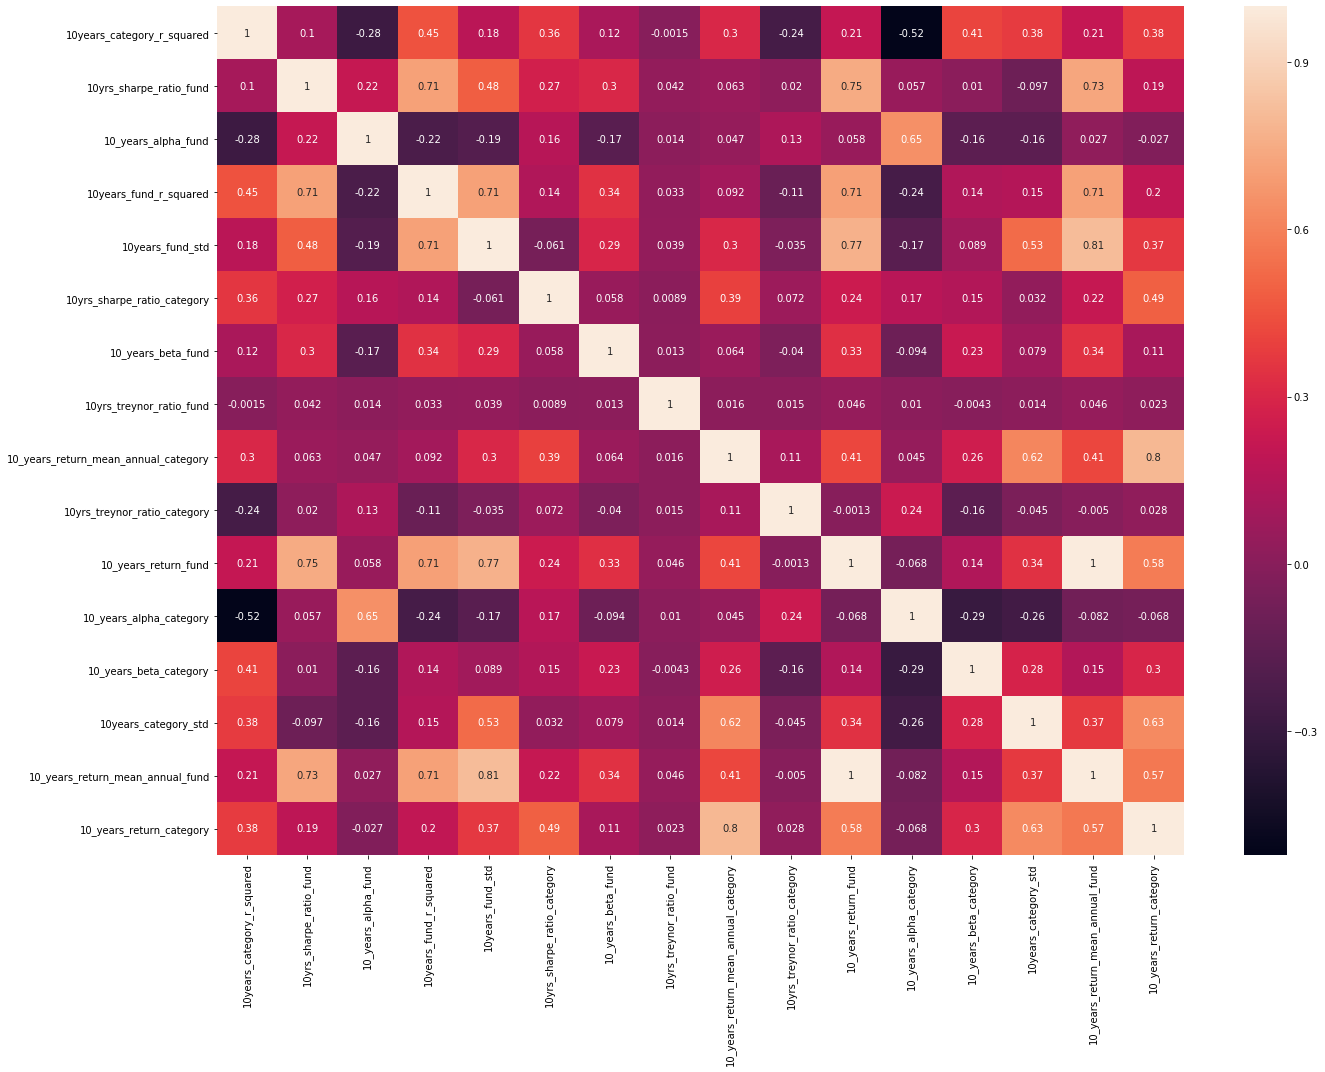

In [212]:
plt.figure(figsize=(20,15))
return_10year_corr=sns.heatmap(return_10year.corr(), annot=True)
b,t=return_10year_corr.get_ylim()
return_10year_corr.set_ylim(b+.5,t-.5)
plt.tight_layout()

# Dataset cleaning

In [683]:
dataset=fund_specs.merge(fund_ratios)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 15 columns):
investment_class                 25000 non-null int64
total_assets                     25000 non-null float64
yield                            25000 non-null float64
greatstone_rating                20000 non-null float64
inception_date                   25000 non-null int32
tag                              25000 non-null int64
fund_size                        25000 non-null int64
return_ytd                       25000 non-null float64
fund_id                          25000 non-null object
fund_ratio_net_annual_expense    25000 non-null float64
pb_ratio                         25000 non-null float64
ps_ratio                         25000 non-null float64
mmc                              25000 non-null float64
pc_ratio                         25000 non-null float64
pe_ratio                         25000 non-null float64
dtypes: float64(10), int32(1), int64(3), object(1)
memory us

In [684]:
dataset=dataset.merge(bond_ratings)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 25 columns):
investment_class                 25000 non-null int64
total_assets                     25000 non-null float64
yield                            25000 non-null float64
greatstone_rating                20000 non-null float64
inception_date                   25000 non-null int32
tag                              25000 non-null int64
fund_size                        25000 non-null int64
return_ytd                       25000 non-null float64
fund_id                          25000 non-null object
fund_ratio_net_annual_expense    25000 non-null float64
pb_ratio                         25000 non-null float64
ps_ratio                         25000 non-null float64
mmc                              25000 non-null float64
pc_ratio                         25000 non-null float64
pe_ratio                         25000 non-null float64
bb_rating                        25000 non-null float64
belo

In [685]:
dataset=dataset.merge(fund_allocations)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 34 columns):
investment_class                          25000 non-null int64
total_assets                              25000 non-null float64
yield                                     25000 non-null float64
greatstone_rating                         20000 non-null float64
inception_date                            25000 non-null int32
tag                                       25000 non-null int64
fund_size                                 25000 non-null int64
return_ytd                                25000 non-null float64
fund_id                                   25000 non-null object
fund_ratio_net_annual_expense             25000 non-null float64
pb_ratio                                  25000 non-null float64
ps_ratio                                  25000 non-null float64
mmc                                       25000 non-null float64
pc_ratio                                  25000 non-nul

In [686]:
dataset=dataset.merge(other_specs)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 70 columns):
investment_class                          25000 non-null int64
total_assets                              25000 non-null float64
yield                                     25000 non-null float64
greatstone_rating                         20000 non-null float64
inception_date                            25000 non-null int32
tag                                       25000 non-null int64
fund_size                                 25000 non-null int64
return_ytd                                25000 non-null float64
fund_id                                   25000 non-null object
fund_ratio_net_annual_expense             25000 non-null float64
pb_ratio                                  25000 non-null float64
ps_ratio                                  25000 non-null float64
mmc                                       25000 non-null float64
pc_ratio                                  25000 non-nul

In [687]:
dataset=dataset.merge(return_3year)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 85 columns):
investment_class                          25000 non-null int64
total_assets                              25000 non-null float64
yield                                     25000 non-null float64
greatstone_rating                         20000 non-null float64
inception_date                            25000 non-null int32
tag                                       25000 non-null int64
fund_size                                 25000 non-null int64
return_ytd                                25000 non-null float64
fund_id                                   25000 non-null object
fund_ratio_net_annual_expense             25000 non-null float64
pb_ratio                                  25000 non-null float64
ps_ratio                                  25000 non-null float64
mmc                                       25000 non-null float64
pc_ratio                                  25000 non-nul

In [688]:
dataset=dataset.merge(return_5year)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Columns: 101 entries, investment_class to 5_years_return_category
dtypes: float64(96), int32(1), int64(3), object(1)
memory usage: 19.4+ MB


In [689]:
dataset=dataset.merge(return_10year)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Columns: 117 entries, investment_class to 10_years_return_category
dtypes: float64(112), int32(1), int64(3), object(1)
memory usage: 22.4+ MB


# train, test data and model 

In [690]:
train_data=dataset[dataset.greatstone_rating.notna()]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 24997
Columns: 117 entries, investment_class to 10_years_return_category
dtypes: float64(112), int32(1), int64(3), object(1)
memory usage: 17.9+ MB


In [691]:
train_target=train_data['greatstone_rating'].copy(deep=True)

In [692]:
train_data=train_data.drop(labels=['fund_id','tag','greatstone_rating'],axis=1)

In [693]:
#dt=DecisionTreeClassifier(random_state=11,criterion='entropy')
#dt.fit(train_data,train_target)

In [694]:
rfc=RandomForestClassifier(n_estimators=500,random_state=11,criterion='entropy',class_weight='balanced')
rfc.fit(train_data,train_target)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=11, verbose=0, warm_start=False)

In [695]:
test_data=dataset[dataset.greatstone_rating.isna()]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 24999
Columns: 117 entries, investment_class to 10_years_return_category
dtypes: float64(112), int32(1), int64(3), object(1)
memory usage: 4.5+ MB


In [696]:
test_fund_id=test_data.fund_id.copy()

In [697]:
test_data=test_data.drop(labels=['fund_id','tag','greatstone_rating'],axis=1)

In [698]:
output=rfc.predict(test_data)

In [699]:
submit=pd.DataFrame()
submit['fund_id']=test_fund_id
submit['greatstone_rating']=output

In [700]:
submit.greatstone_rating.value_counts()

3.0    1864
4.0    1159
2.0    1013
5.0     341
0.0     339
1.0     284
Name: greatstone_rating, dtype: int64

In [701]:
submit.to_csv('submit.csv',index=False)